In [31]:
import os
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.lines import Line2D

plt.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('legend', facecolor='white', edgecolor='k', framealpha=1)
plt.rcParams['xtick.major.size'] = 3.5
plt.rcParams['ytick.major.size'] = 3.5
plt.rcParams['xtick.labelsize']  = 12
plt.rcParams['ytick.labelsize']  = 12

In [32]:
legendre_amplitudes = np.loadtxt("./legendre_amplitudes.txt")

lat: -14.48 , lon: 210.9


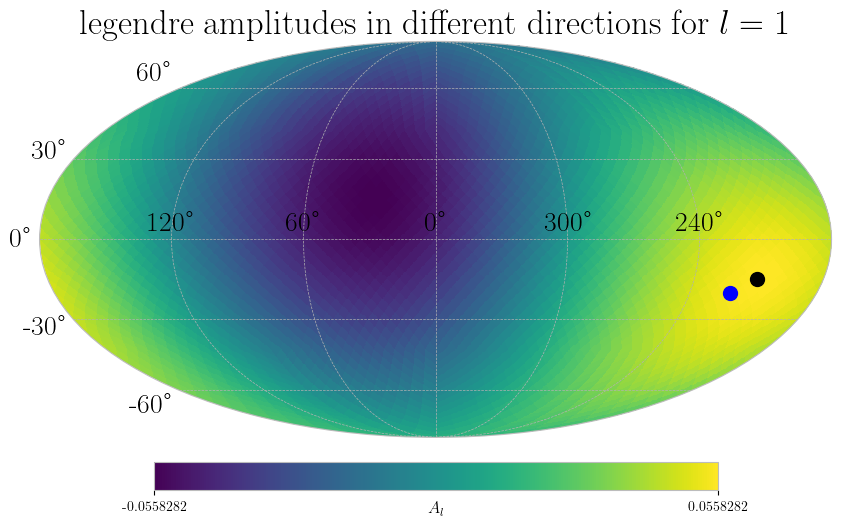

lat: 0.0 , lon: 2.812


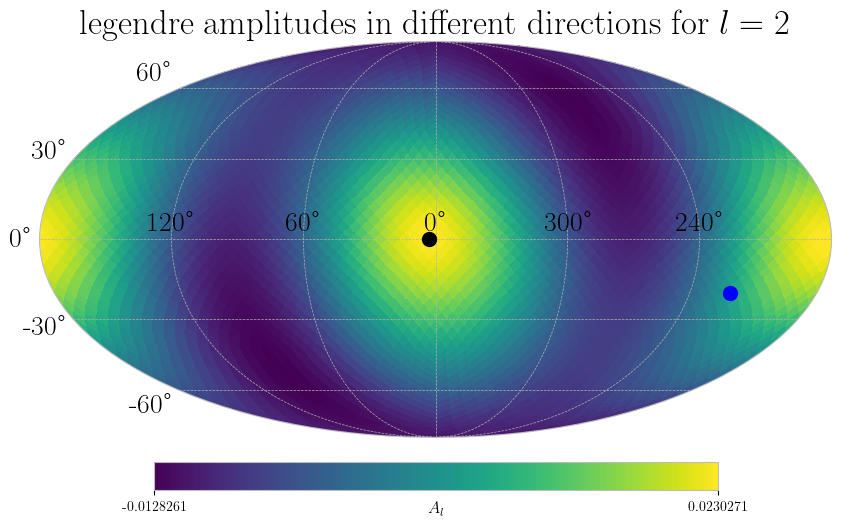

lat: 48.14 , lon: 170.4


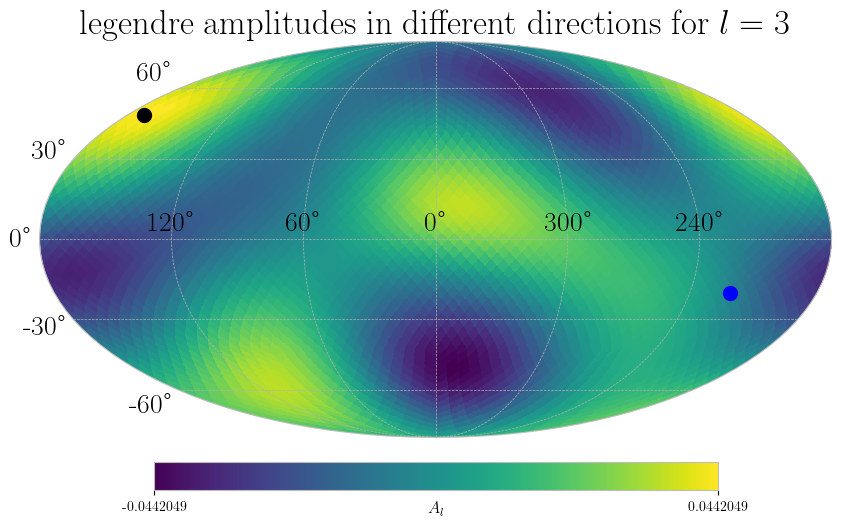

lat: 66.44 , lon: 28.12


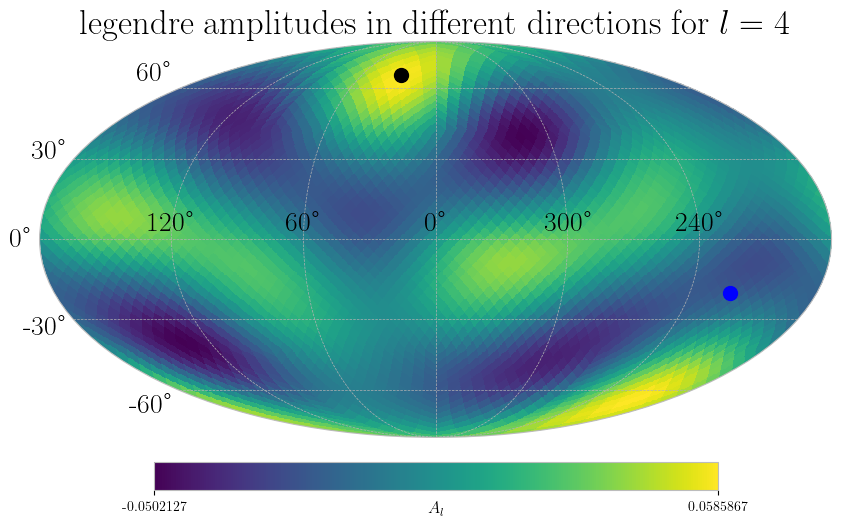

lat: 0.0 , lon: 154.7


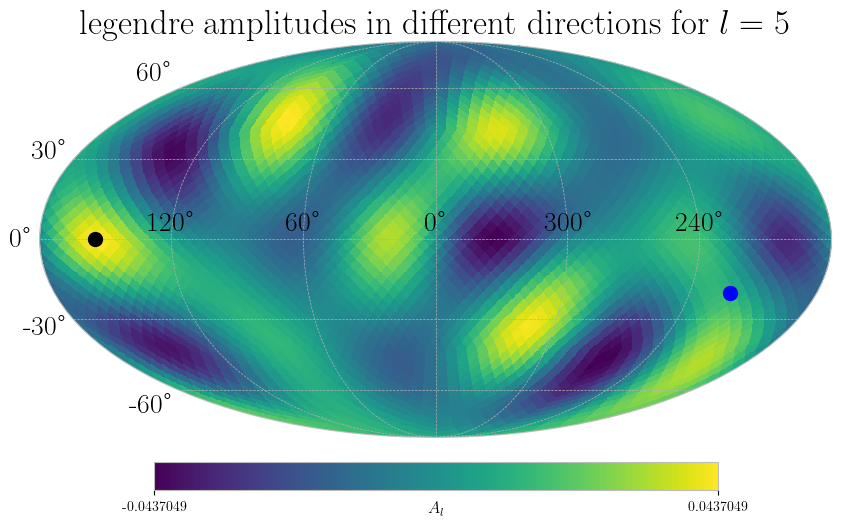

lat: 32.8 , lon: 146.2


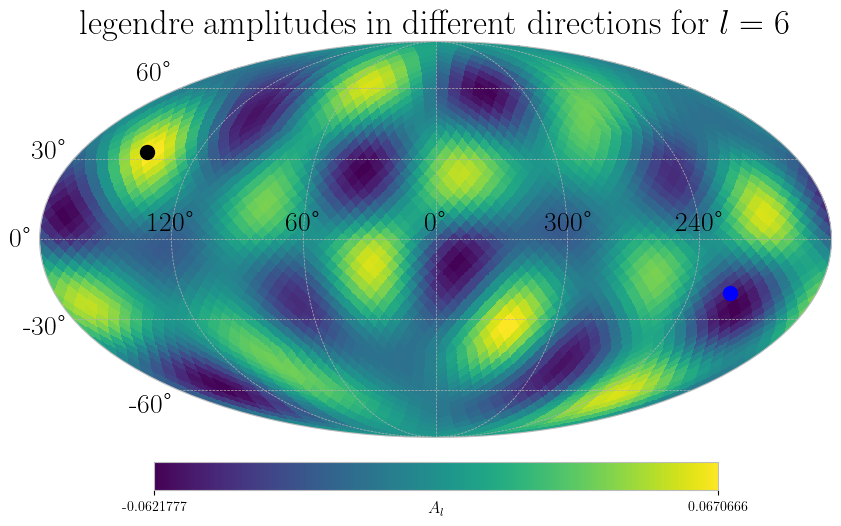

lat: 51.26 , lon: 58.85


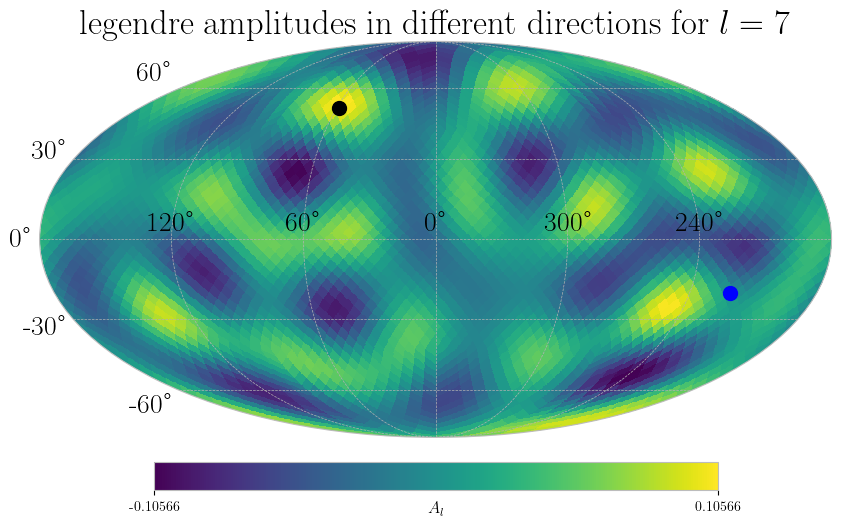

lat: 2.388 , lon: 286.9


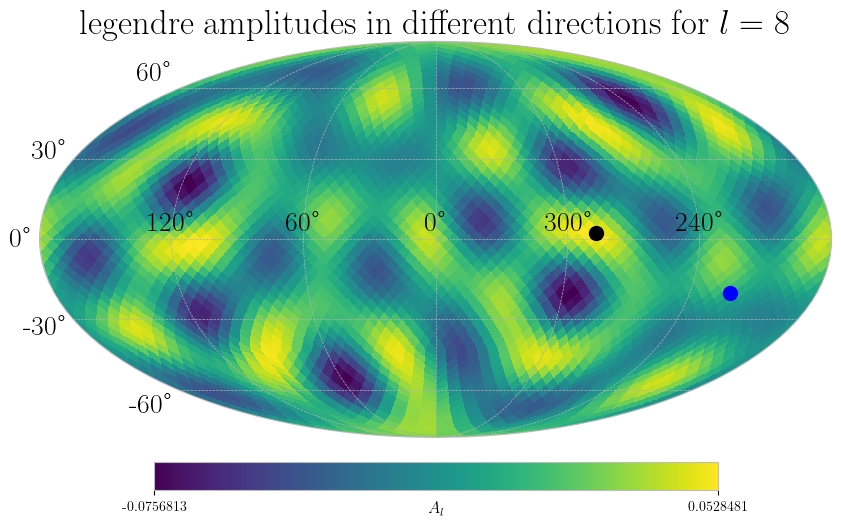

lat: 2.388 , lon: 101.2


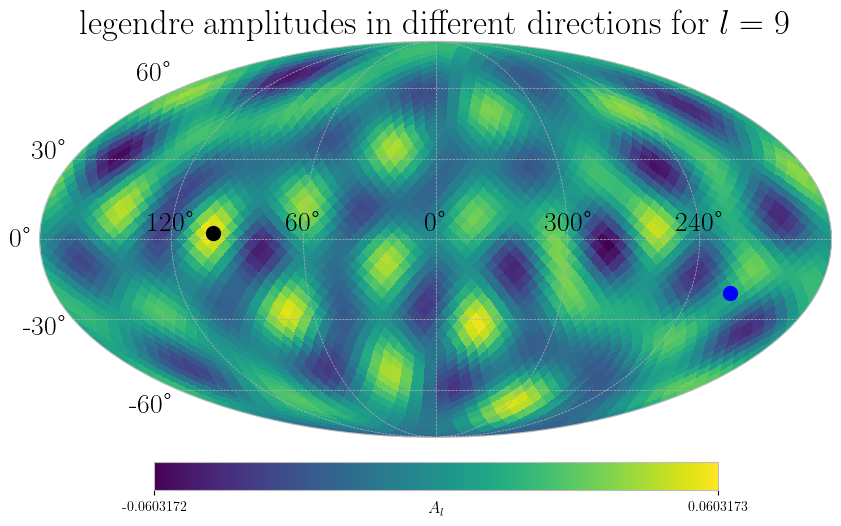

lat: 60.43 , lon: 112.5


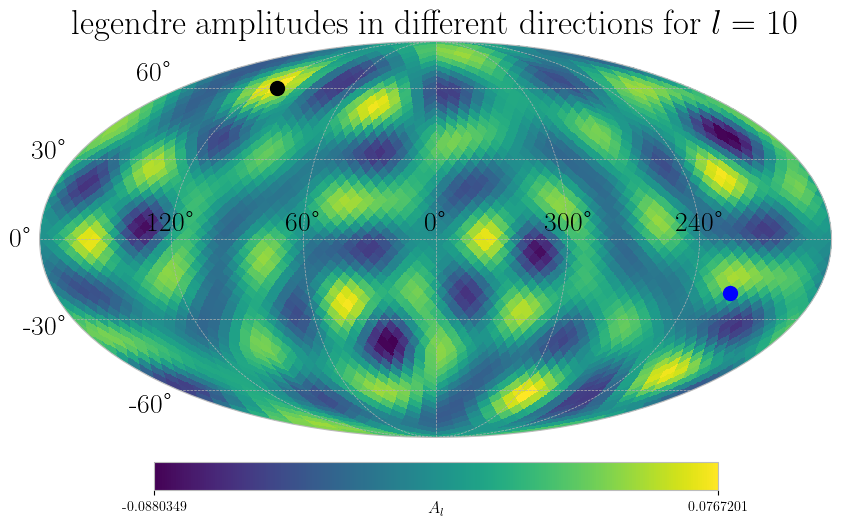

lat: 38.68 , lon: 230.6


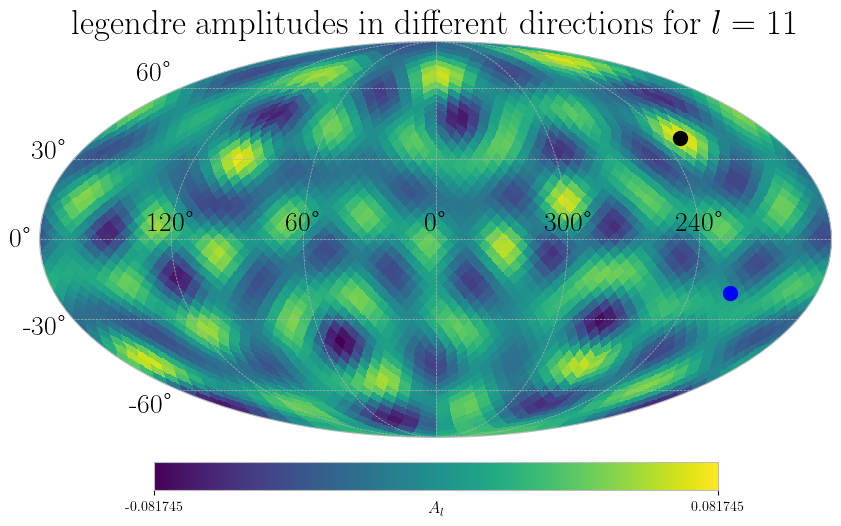

lat: 27.28 , lon: 112.5


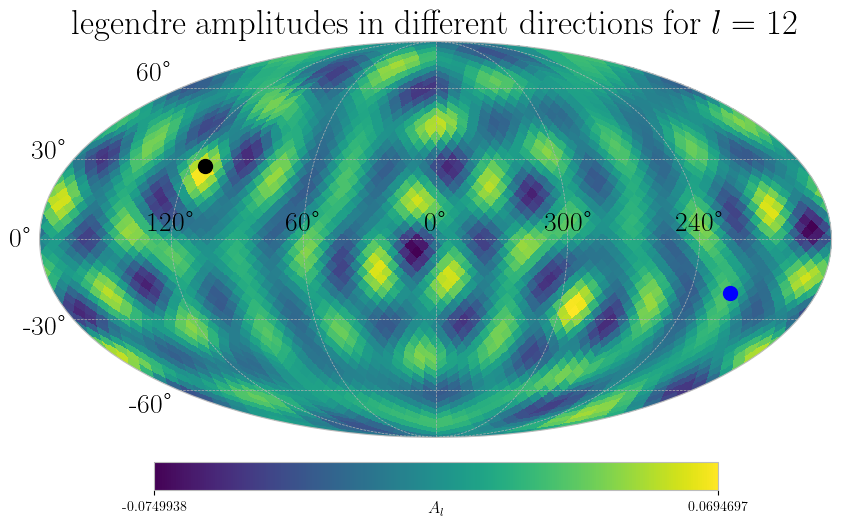

lat: -2.388 , lon: 73.12


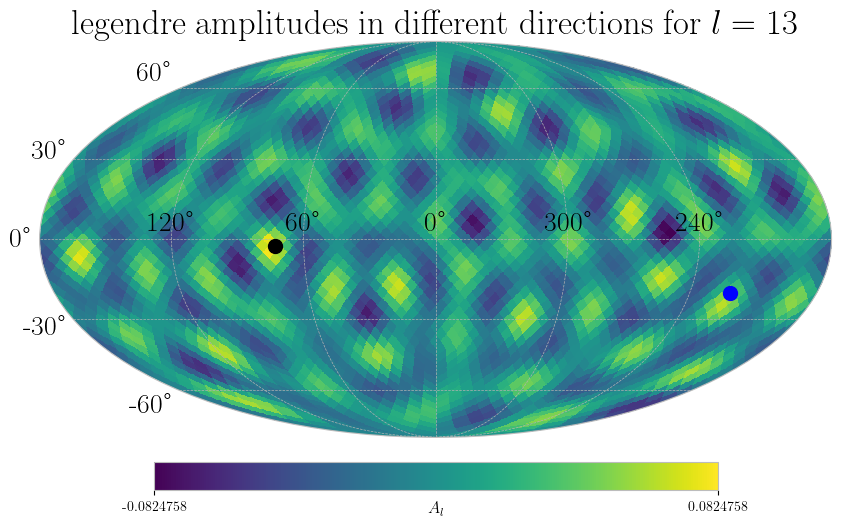

lat: 9.594 , lon: 64.69


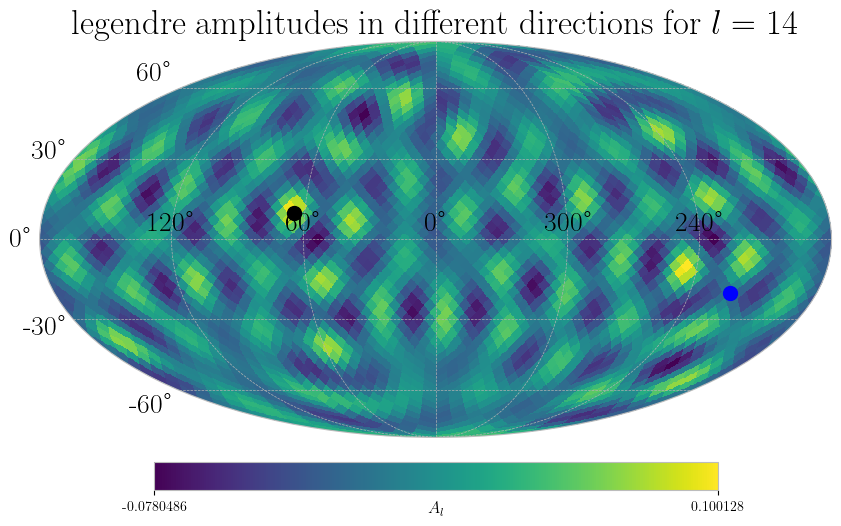

lat: -2.388 , lon: 33.75


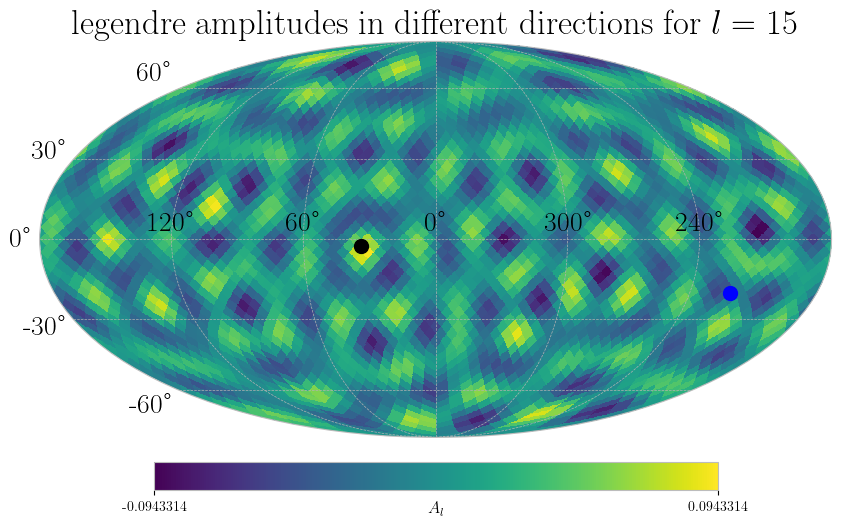

lat: 44.99 , lon: 249.0


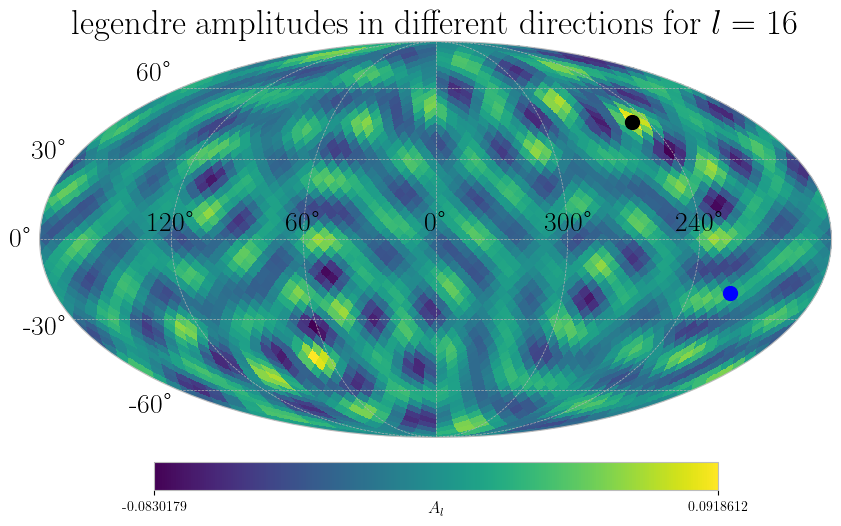

lat: -14.48 , lon: 42.19


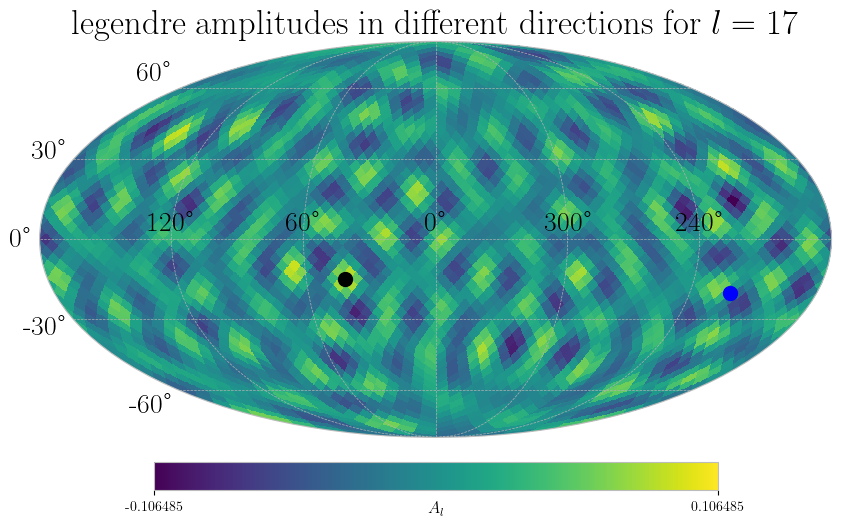

lat: 16.96 , lon: 151.9


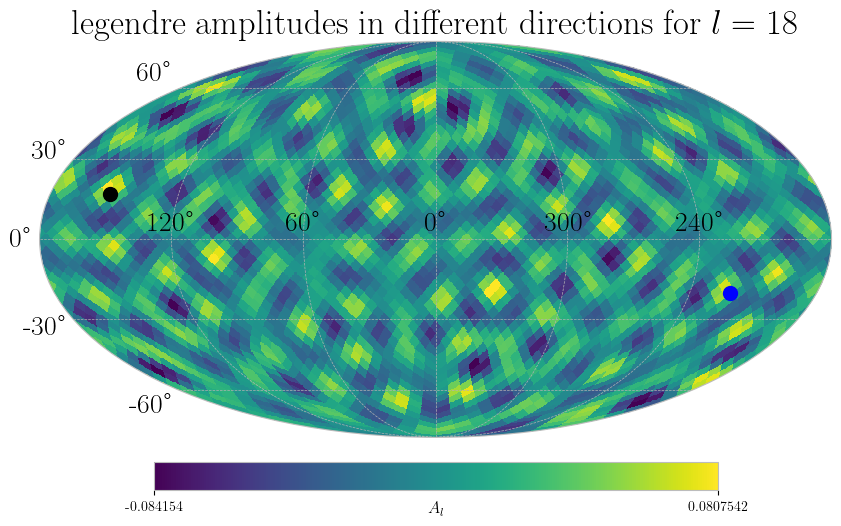

lat: -2.388 , lon: 208.1


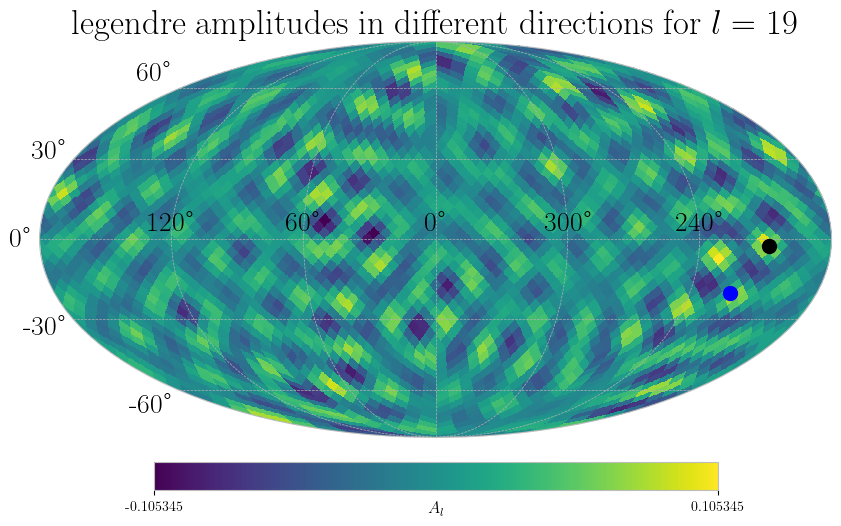

lat: 14.48 , lon: 14.06


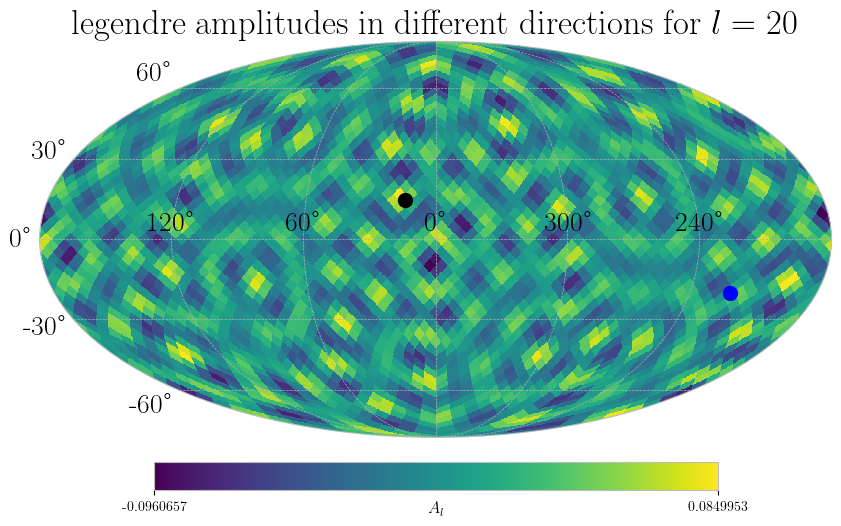

lat: -75.34 , lon: 189.0


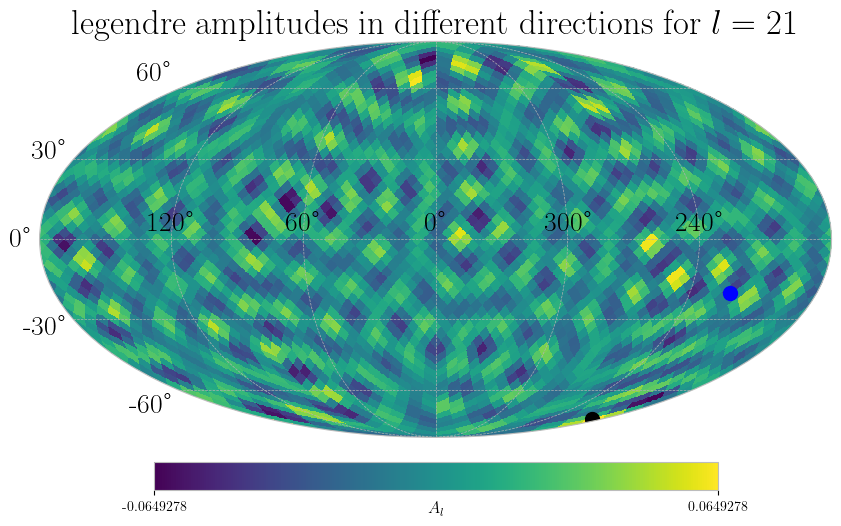

lat: 24.62 , lon: 357.2


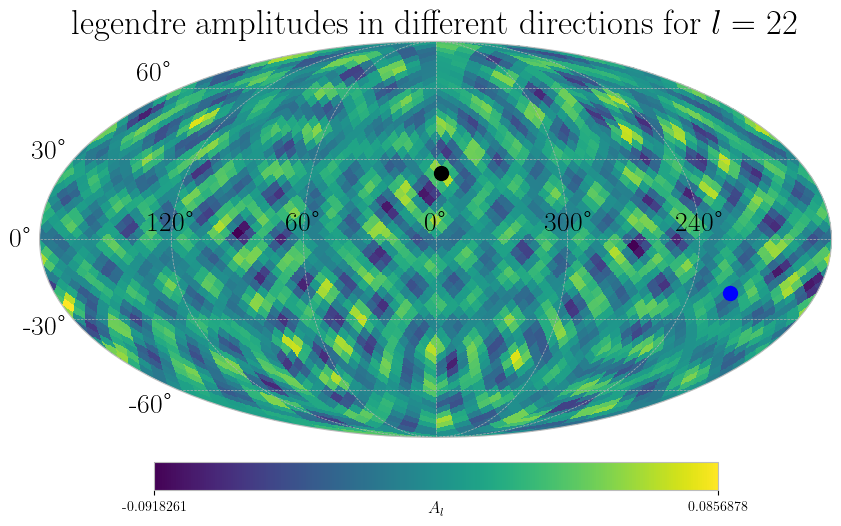

lat: 27.28 , lon: 56.25


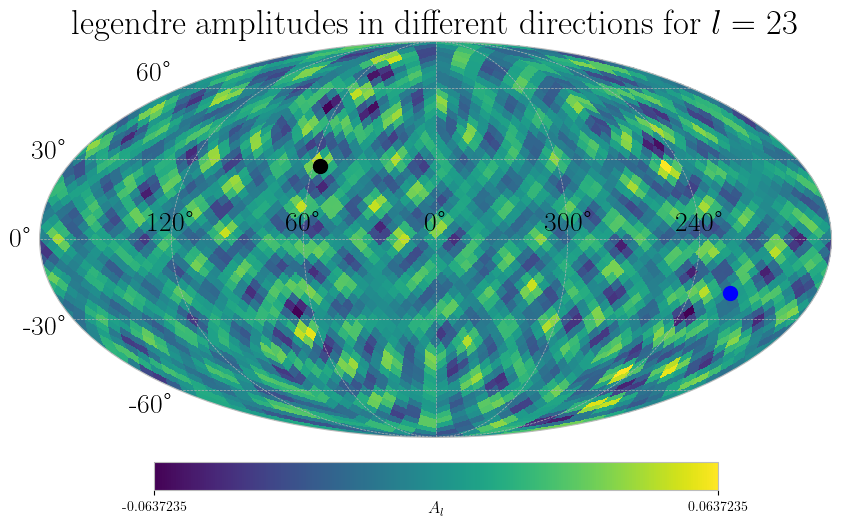

lat: 2.388 , lon: 174.4


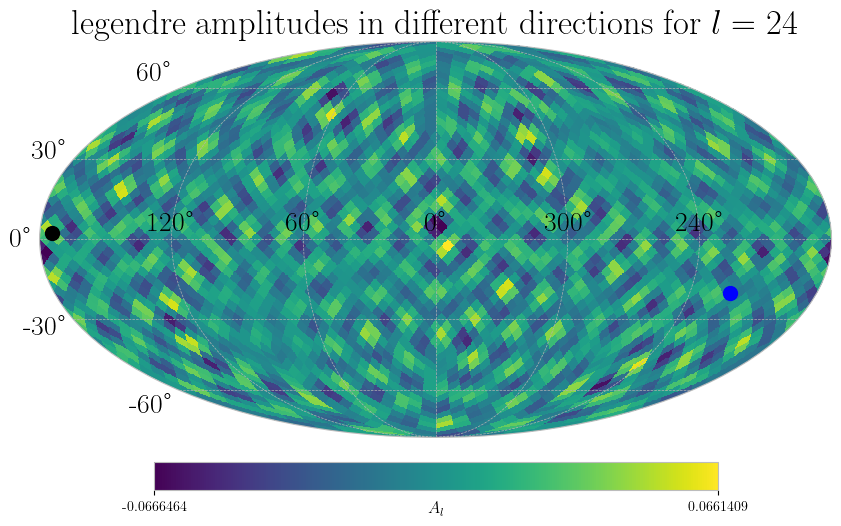

lat: 51.26 , lon: 280.4


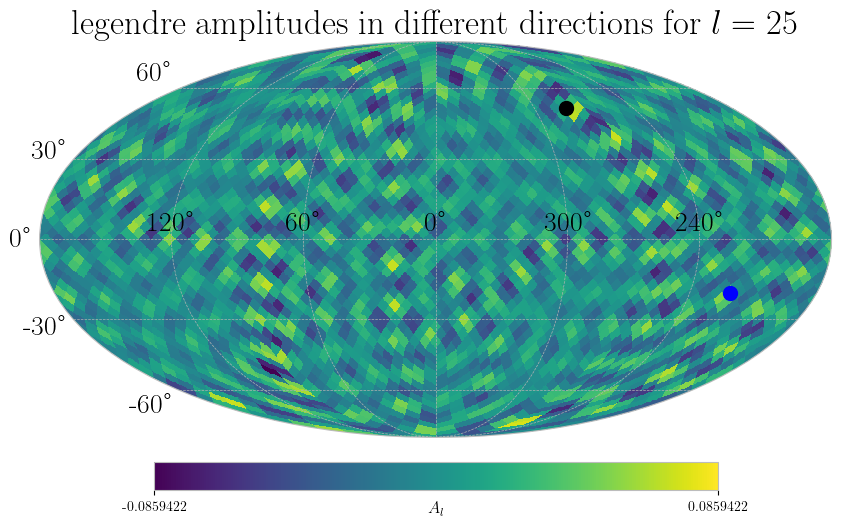

lat: 35.69 , lon: 87.19


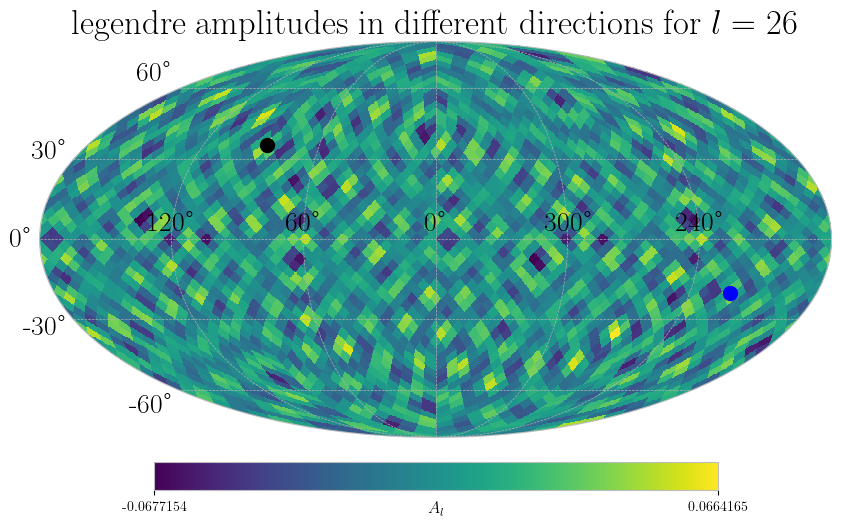

lat: -2.388 , lon: 331.9


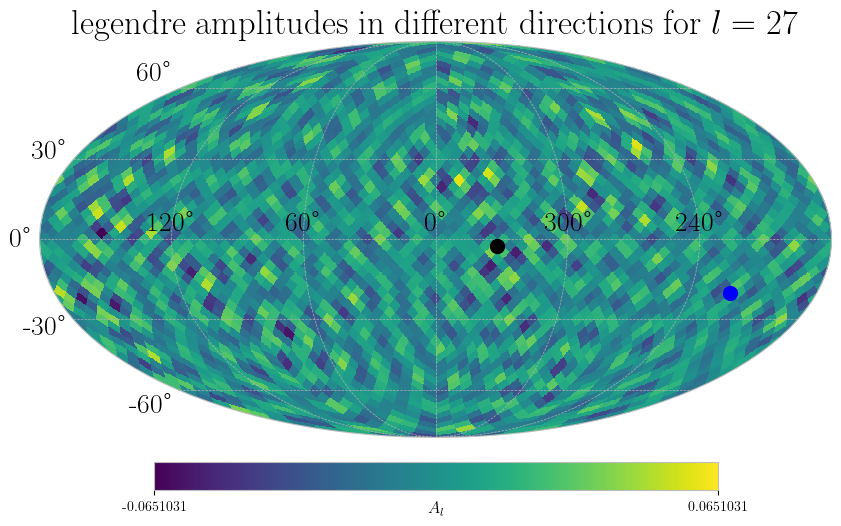

lat: -2.388 , lon: 343.1


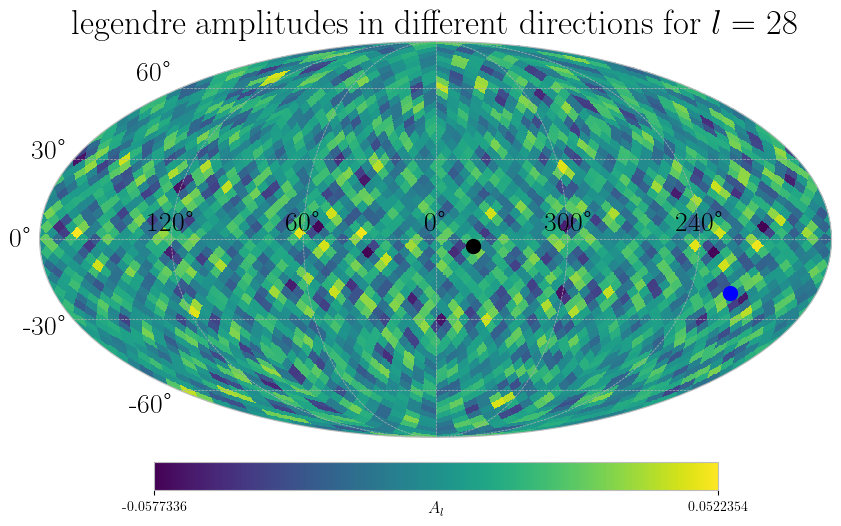

lat: 14.48 , lon: 8.438


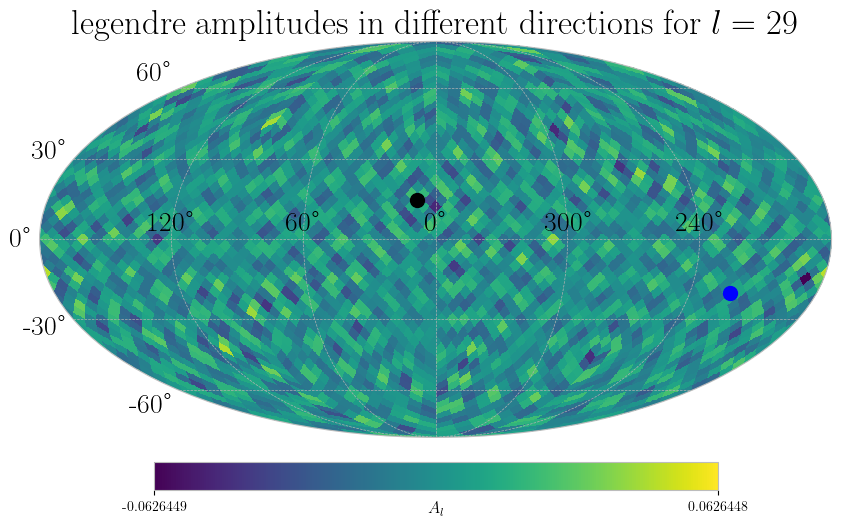

lat: -2.388 , lon: 253.1


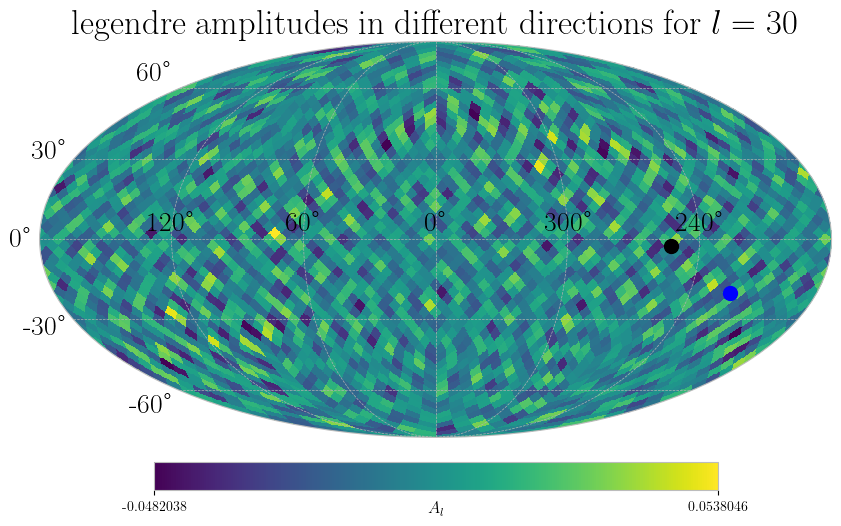

lat: 63.45 , lon: 55.0


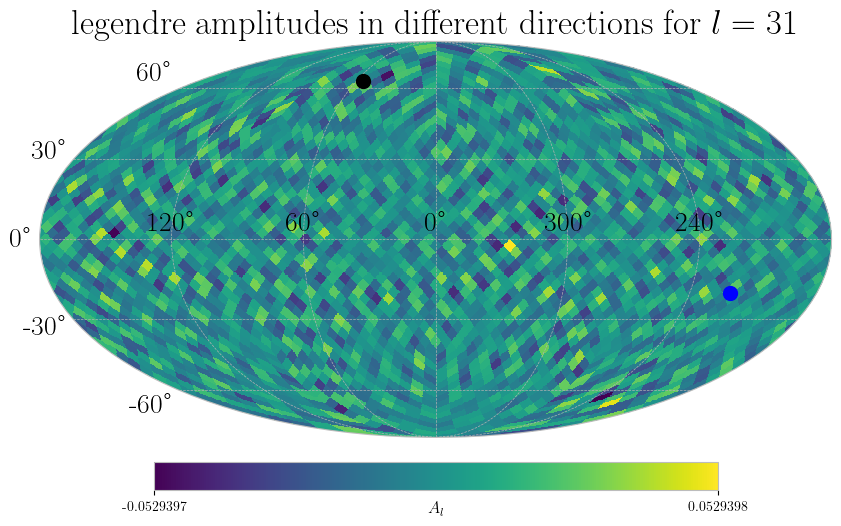

lat: 30.0 , lon: 171.6


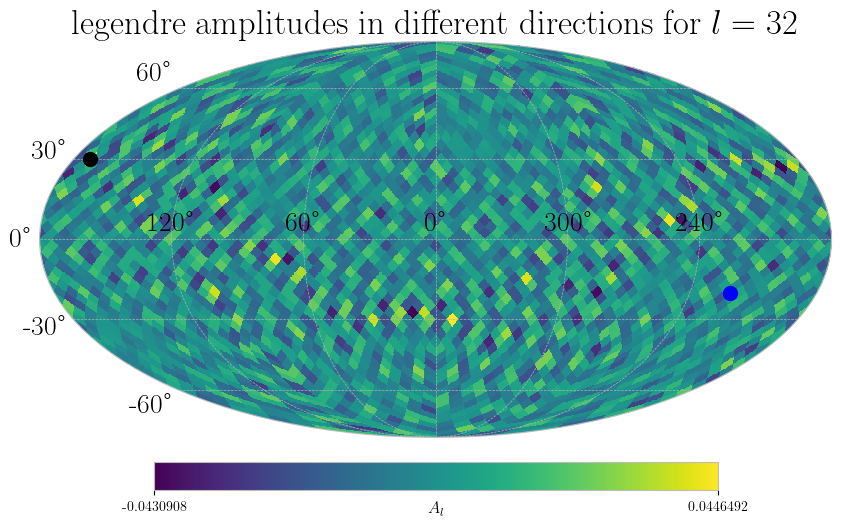

lat: -4.78 , lon: 312.2


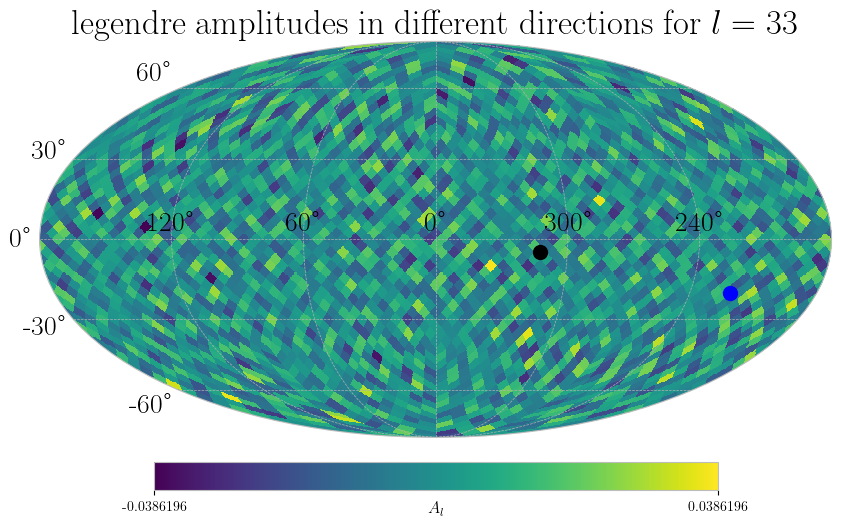

lat: -2.388 , lon: 298.1


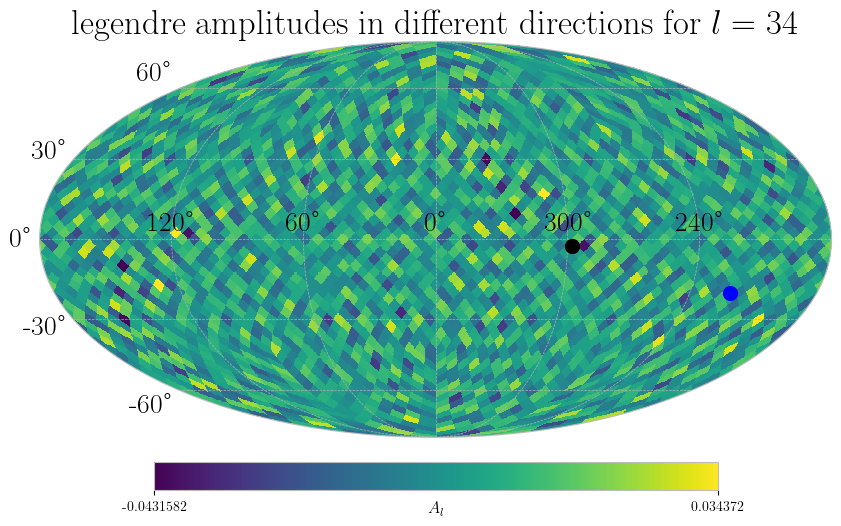

lat: 72.39 , lon: 322.5


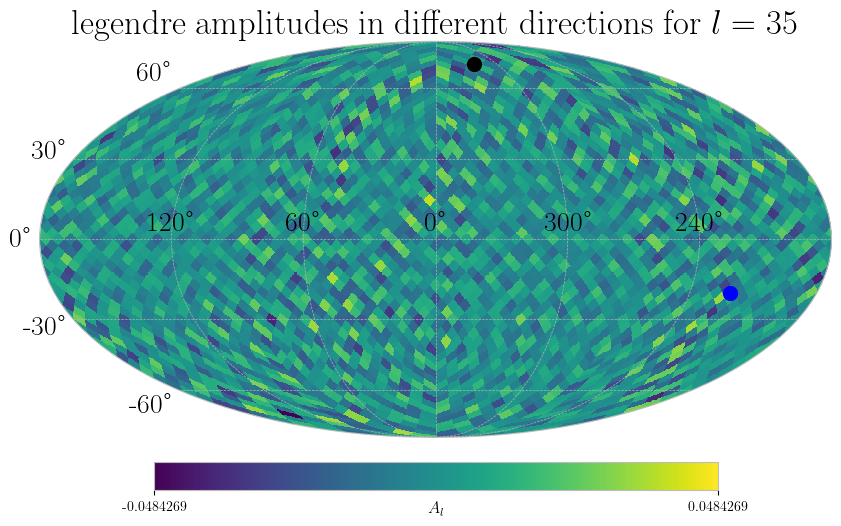

lat: 4.78 , lon: 295.3


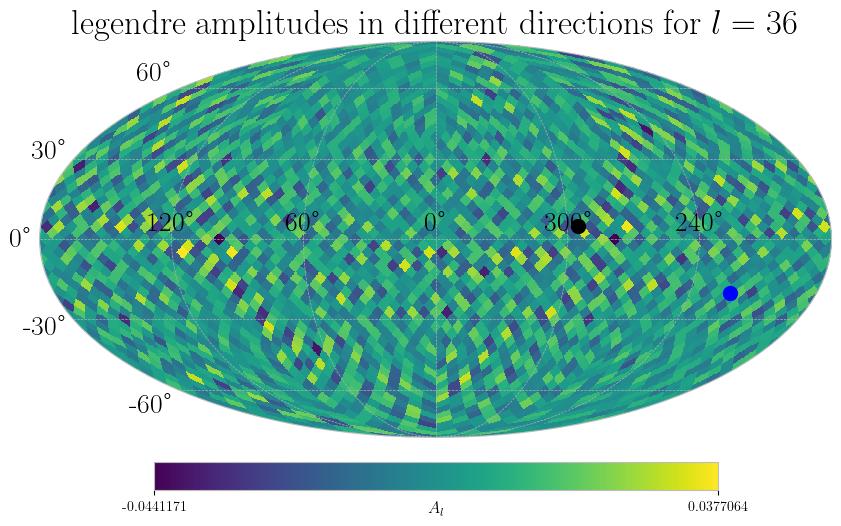

lat: -14.48 , lon: 19.69


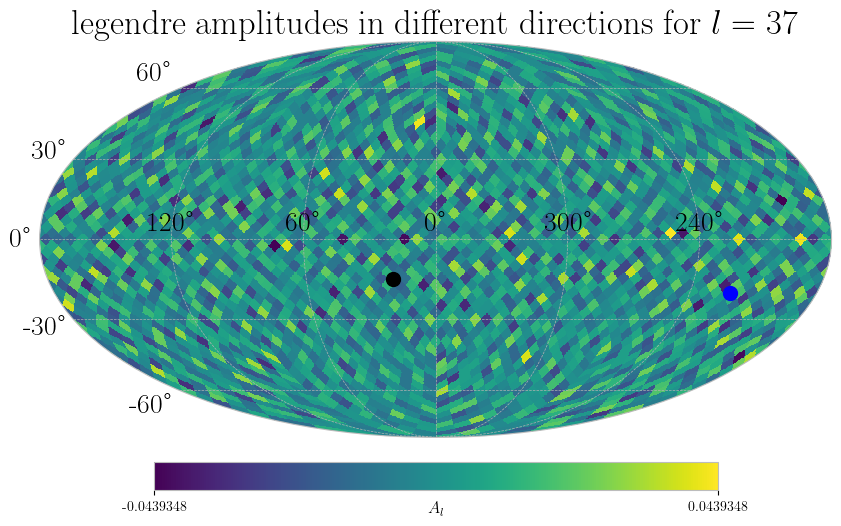

lat: 30.0 , lon: 351.6


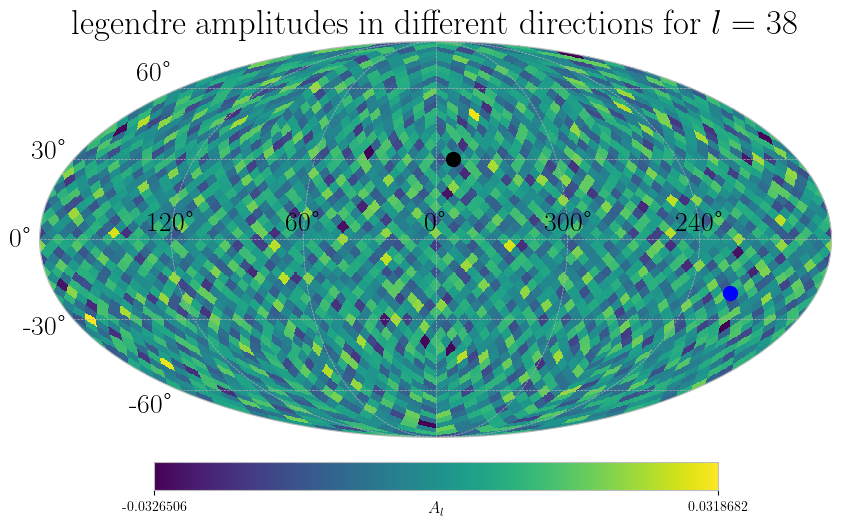

lat: 2.388 , lon: 118.1


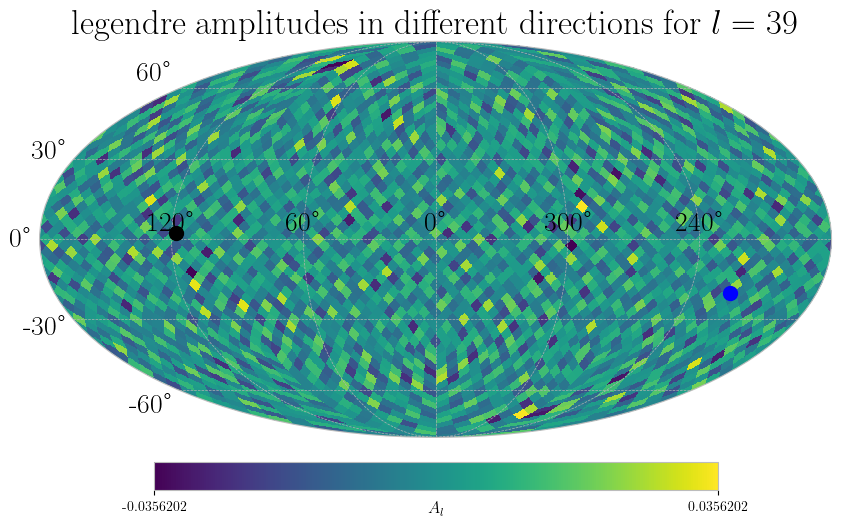

lat: 4.78 , lon: 199.7


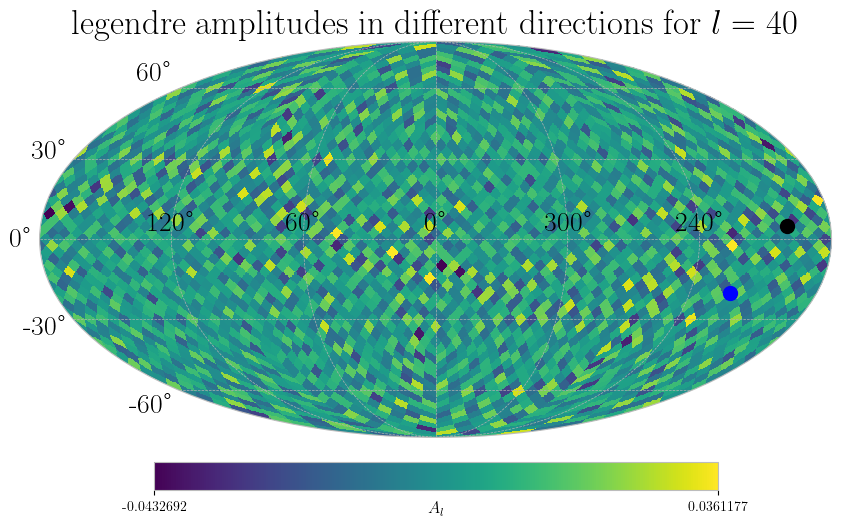

In [89]:

max_l = 40
for l in range(1, max_l + 1):
    amp_map = legendre_amplitudes[l]
    with plt.style.context('bmh'):
        fig, ax = plt.subplots()
        fig.set_size_inches(10,5.5,True)
        # Amplitude Plot
        hp.newvisufunc.projview(
            amp_map,
            fig=1,
            coord=["G"],
            graticule=True,
            graticule_labels=True,
            cbar=True,
            # cmap="jet",
            title=r"legendre amplitudes in different directions for $l = {selected_l}$".format(selected_l = l),
            fontsize={
                "xlabel": 25,
                "ylabel": 25,
                "xtick_label": 20,
                "ytick_label": 20,
                "title": 25,
            },
            xtick_label_color="k",
            ytick_label_color="k",
            hold=True,
            unit=r'$A_l$',
            cb_orientation="horizontal",
            projection_type="mollweide",
        )

        # Planck direction
        col_planck = "b"
        hp.newvisufunc.newprojplot(theta=np.radians(110),
                                phi=np.radians(221-360),
                                marker="o", color=col_planck, markersize=10)

        # Our Direction
        col_ours = "k"
        i_max = np.argmax(amp_map)
        theta, phi = hp.pix2ang(nside = 16, ipix = i_max)
        print("lat: {:.04}".format(90 - np.degrees(theta)),", lon: {:.04}".format(np.degrees(phi)))
        phi = (phi - 2*np.pi) if (phi > np.pi) else (phi + 2*np.pi) if (phi < -np.pi) else phi
        hp.newvisufunc.newprojplot( theta,
                                    phi,
                                    marker="o", color=col_ours, markersize=10)
    plt.show()